# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan adalah **Students Performance in Exams** dari Kaggle. Dataset ini berisi data performa akademik siswa berdasarkan nilai matematika,
membaca, dan menulis, serta faktor pendukung seperti gender, lunch,
parental level of education, dan test preparation course.

Tujuan dari eksperimen ini adalah melakukan eksplorasi data (EDA),
preprocessing data, serta menyiapkan dataset yang siap digunakan
pada tahap pelatihan model machine learning.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
!pip install mlflow kaggle pandas numpy scikit-learn matplotlib seaborn

import pandas as pd
import numpy as np
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.2/764.2 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.8 MB/s eta 0:00:00


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d spscientist/students-performance-in-exams
!unzip students-performance-in-exams.zip

Dataset URL: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
License(s): unknown
  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 28.8MB/s]
Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [4]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dataset yang digunakan dalam analisis ini diambil dari Kaggle dengan nama "Students Performance in Exams", yang berisi data tentang kinerja akademik siswa dalam tiga ujian (matematika, membaca, dan menulis).

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

#### Cek Struktur Data

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Cek Missing Velue

In [6]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Dilakukan pengecekan missing values menggunakan df.isnull().sum().
Hasil menunjukkan tidak terdapat nilai kosong, sehingga tidak diperlukan penanganan lanjutan.


#### Data duplikat

In [7]:
df.duplicated().sum()

np.int64(0)

Dilakukan pengecekan data duplikat menggunakan df.duplicated().
Hasil menunjukkan tidak terdapat data duplikat.


#### Distribusi Nilai

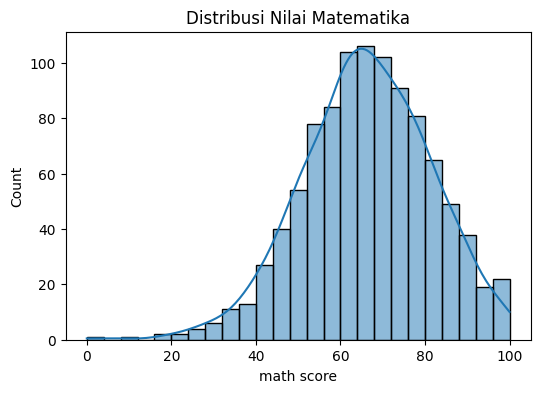

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['math score'], kde=True)
plt.title("Distribusi Nilai Matematika")
plt.show()

Grafik menunjukkan bahwa sebagian besar siswa mendapatkan nilai matematika antara 60 hingga 80, dengan puncaknya di sekitar 65. Ini berarti performa matematika siswa secara umum cukup baik. Hanya sedikit siswa yang mendapat nilai sangat rendah atau sangat tinggi. Bentuk grafik mendekati normal, jadi penyebaran nilai cukup merata, tapi sedikit lebih banyak siswa yang nilainya di atas rata-rata.

#### Korelasi Nilai

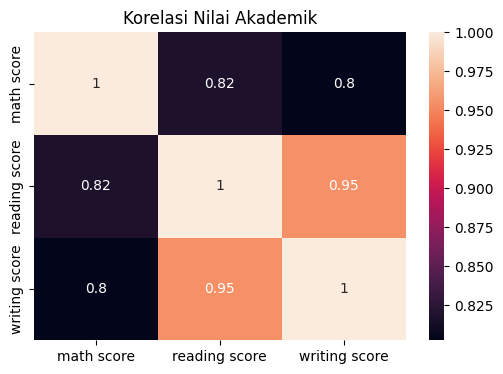

In [9]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['math score','reading score','writing score']].corr(),
    annot=True
)
plt.title("Korelasi Nilai Akademik")
plt.show()

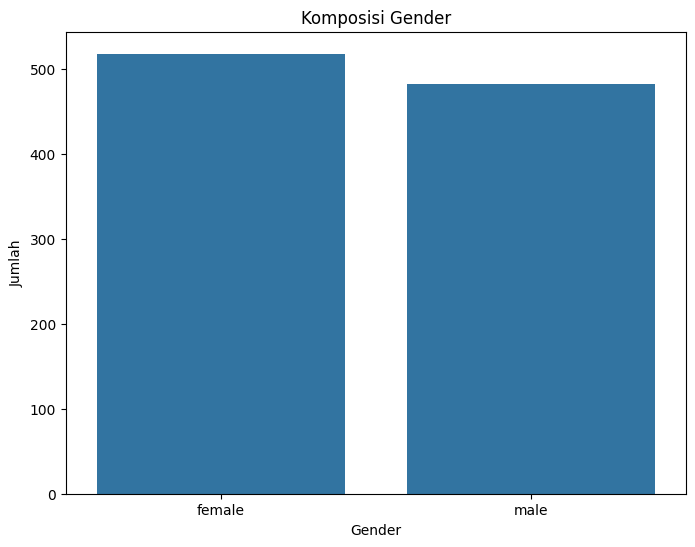

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Komposisi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah')
plt.show()

#### Relationship

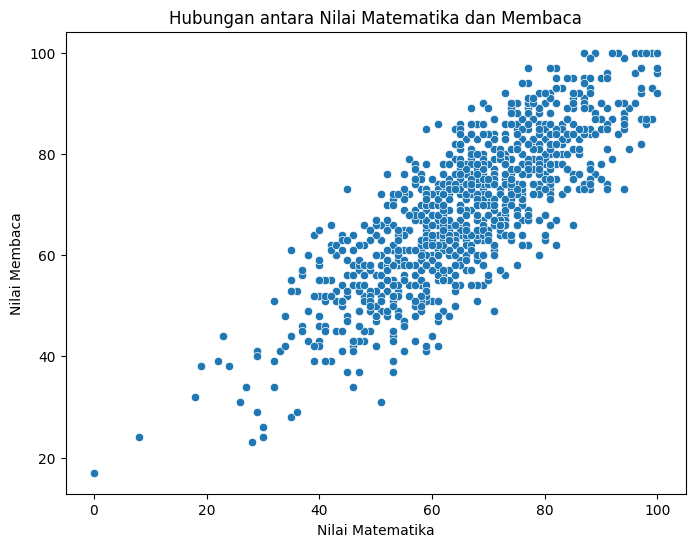

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='math score', y='reading score', data=df)
plt.title('Hubungan antara Nilai Matematika dan Membaca')
plt.xlabel('Nilai Matematika')
plt.ylabel('Nilai Membaca')
plt.show()

# **5. Data Preprocessing**

#### Handling Outliers Value

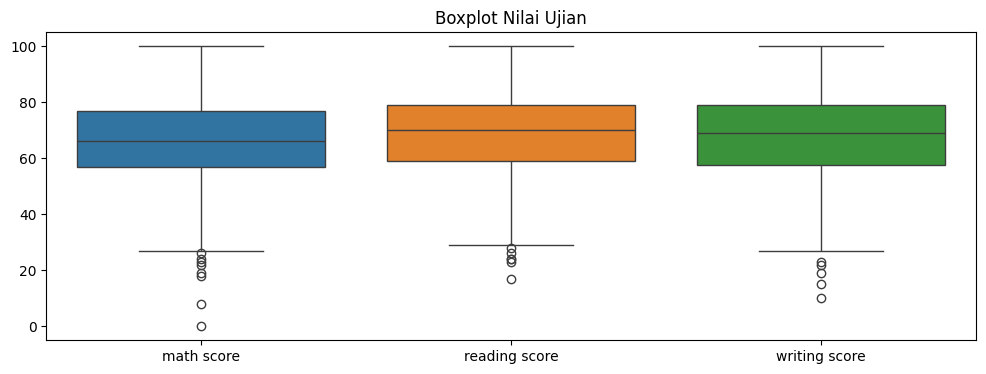

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title("Boxplot Nilai Ujian")
plt.show()

In [13]:
df['test_prep'] = np.where(
    df['test preparation course'] == 'completed', 1, 0
)

# drop kolom asli
df = df.drop(columns=['test preparation course'])

#### Handling Inconsistent/Noise Data

In [14]:
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test_prep']:
    print(f"{col} -> {df[col].unique()}")

gender -> ['female' 'male']
race/ethnicity -> ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education -> ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch -> ['standard' 'free/reduced']
test_prep -> [0 1]


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode kolom kategorikal
df['gender'] = le.fit_transform(df['gender'])
df['race/ethnicity'] = le.fit_transform(df['race/ethnicity'])
df['parental level of education'] = le.fit_transform(df['parental level of education'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test_prep'] = le.fit_transform(df['test_prep'])
df['average_score'] = (df['math score'] + df['writing score']) / 2

In [16]:
df.to_csv("students_performance_Raw.csv", index=False)

#### Encoding Data Kategorikal

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test_prep']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [18]:
df[categorical_cols].head()

,gender,race/ethnicity,parental level of education,lunch,test_prep
0,0,1,1,1,0
1,0,2,4,1,1
2,0,1,3,1,0
3,1,0,0,0,0
4,1,2,4,1,0


Setiap kategori unik diubah menjadi angka, misalnya 'male' menjadi 0 dan 'female' menjadi 1. Hal ini memudahkan model pembelajaran mesin untuk memproses data tersebut karena hanya menerima input numerik. Setelah itu, kita menampilkan 5 baris pertama untuk memastikan perubahan berhasil.

#### Deteksi Outlier

In [19]:
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['math score'] >= lower) & (df['math score'] <= upper)]


#### Normalisasi

In [20]:
from sklearn.preprocessing import StandardScaler

X = df.drop('test_prep', axis=1)
y = df['test_prep']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### Dataset Final

In [21]:
df_final = pd.DataFrame(X_scaled, columns=X.columns)
df_final['test_prep'] = y.values
df_final.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score,average_score,test_prep
0,-0.972162,-1.018578,-0.809146,0.735100,0.379254,0.177976,0.380015,0.401366,0
1,-0.972162,-0.154963,0.832312,0.735100,0.173106,1.440061,1.325659,0.797505,1
2,-0.972162,-1.018578,0.285159,0.735100,1.616141,1.790640,1.663389,1.733832,0
3,1.028636,-1.882193,-1.356299,-1.360358,-1.338645,-0.873762,-1.646366,-1.579326,0
4,1.028636,-0.154963,0.832312,0.735100,0.654118,0.598671,0.447561,0.581429,0


#### Simpan dataset preprocesing

In [22]:
df_final.to_csv("students_performance_preprocessed.csv", index=False)